In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('Diamond Price Prediction.csv')
df

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Exploratory Data Analysis

<AxesSubplot:xlabel='Cut(Quality)', ylabel='Price(in US dollars)'>

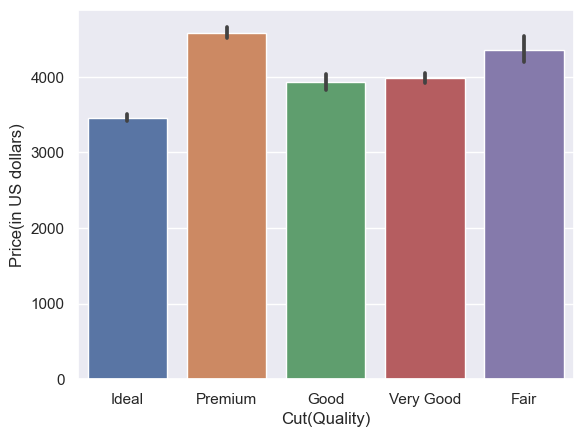

In [ ]:
sns.barplot(data=df, x="Cut(Quality)", y="Price(in US dollars)")
#Premium Quality has the highest price for diamond

<AxesSubplot:xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

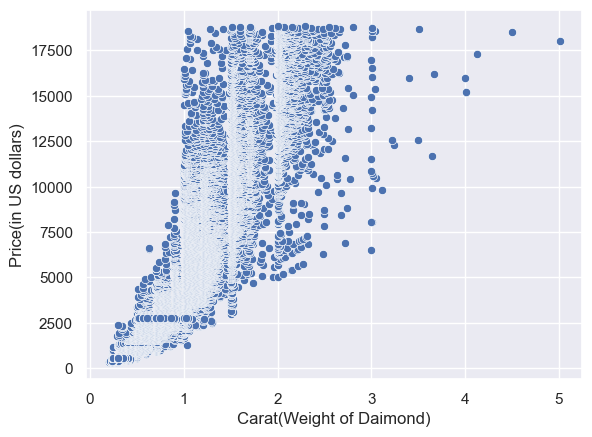

In [ ]:
sns.scatterplot(data=df, x="Carat(Weight of Daimond)", y="Price(in US dollars)")

<AxesSubplot:xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

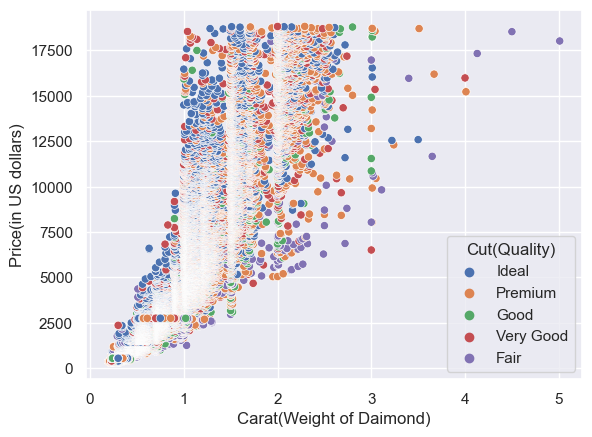

In [ ]:
sns.scatterplot(data=df, x="Carat(Weight of Daimond)", y="Price(in US dollars)", hue="Cut(Quality)", palette="deep")

<AxesSubplot:xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

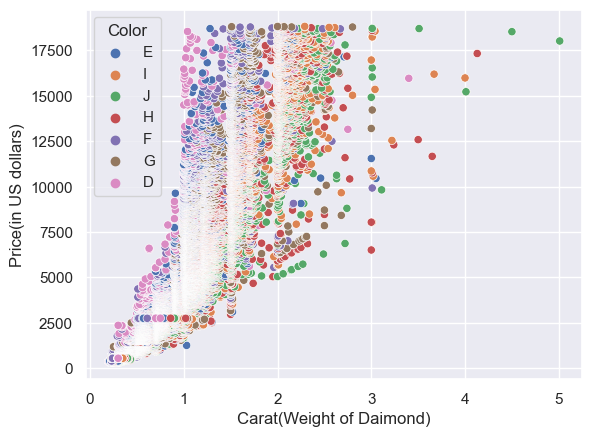

In [ ]:
sns.scatterplot(data=df, x="Carat(Weight of Daimond)", y="Price(in US dollars)", hue="Color", palette="deep")

<AxesSubplot:xlabel='Color', ylabel='Price(in US dollars)'>

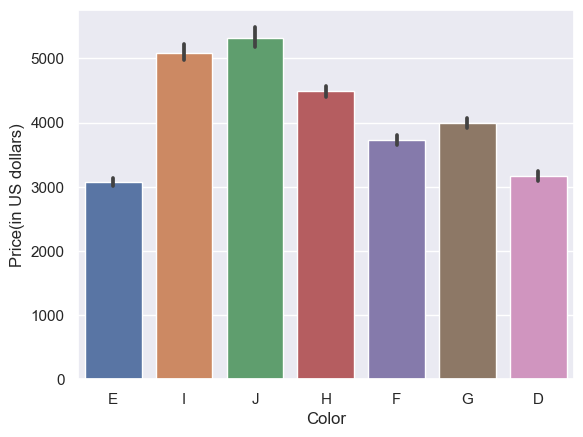

In [ ]:
sns.barplot(data=df, x="Color", y="Price(in US dollars)")

<AxesSubplot:xlabel='Clarity', ylabel='Price(in US dollars)'>

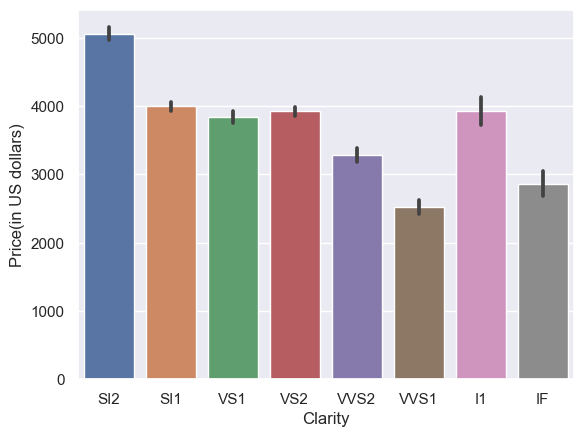

In [ ]:
sns.barplot(data=df, x="Clarity", y="Price(in US dollars)")
#SI2 has the highest clarity price

# Data Preprocessing

In [ ]:
df.dtypes

Carat(Weight of Daimond)    float64
Cut(Quality)                 object
Color                        object
Clarity                      object
Depth                       float64
Table                       float64
Price(in US dollars)          int64
X(length)                   float64
Y(width)                    float64
Z(Depth)                    float64
dtype: object

In [ ]:
df['Cut(Quality)'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['Color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df['Clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Cut(Quality)']= label_encoder.fit_transform(df['Cut(Quality)'])
df['Cut(Quality)'].unique()

array([2, 3, 1, 4, 0])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Color']= label_encoder.fit_transform(df['Color'])
df['Color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Clarity']= label_encoder.fit_transform(df['Clarity'])
df['Clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

# Machine Learning Model Building

In [ ]:
X = df.drop('Price(in US dollars)', axis=1)
y = df['Price(in US dollars)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 354.16439562476825
MSE is 524367.0390480163
R2 score is 0.9669204129976543
RMSE score is 724.1319210254553


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 266.16424879973925
MSE is 294799.9292444162
R2 score is 0.9814026069879784
RMSE score is 542.9548132620395


# R2 Score Comparison :

Decision Tree Regressor : 96.69 %
Random Forest Regressor : 98.14 %